In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [50]:
def BashMoulton(f, y0, x0, xf, h):
    N = 99 #paso

    x = np.zeros(N+1) #generar x
    for i in range(N+1):
        x[i] = x0 + i*h

    y = np.zeros(N+1) #generar y con y0
    y[0] = y0

    f_values = np.zeros(N+1) #4 puntos
    for i in range(N+1): 
        f_values[i] = f(x[i],y[i])

    for n in range(3, N):
        y_p = y[n] + h/720 * (1901*f_values[n] - 2774*f_values[n-1] + 2616*f_values[n-2] - 9*f_values[n-3] + 251*f_values[n-4]) #bashforth

        f_p = f(x[n+1], y_p)
        y[n+1] = y[n] + h/1440 * (1427*f_p - 798*f_values[n-1] + 482*f_values[n-2] - 173*f_values[n-3] + 27*f_values[n-4]) #moulton

        np.append(y, (475*h/1440)*f(x[n + 1], y[n + 1]))

    return x, y


In [51]:
def f(t, y):
    return t+2*y

In [52]:
x = np.linspace(0.,4.,100)
yo = 0
h = x[1]-x[0]

y_sol = BashMoulton(f,yo,x[0],x[-1],h)

y_exacta = np.zeros(len(x))
for i in range(len(x)):
    y_exacta[i]=-x[i]/2-(1-np.e**(2*x[i]))/4

len(y_sol[1])

100

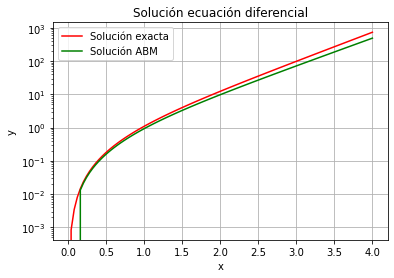

In [53]:
plt.figure()
plt.plot(x,y_exacta,color='r', label='Solución exacta')
plt.plot(x, y_sol[1], color='green', label='Solución ABM')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución ecuación diferencial')
plt.legend()
plt.grid(True)
plt.show()